In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
def load_and_process_image(img_path):
    img = Image.open(img_path)
    img = img.resize((32, 32))
    img_array = np.array(img)
    return img_array.flatten()

In [3]:
img_paths = []
domains = []

with open('../FAZ_val.txt') as file:
    for name in file:
        img_name = name[:-1]
        for domain in range(1, 6):
            path = '../data/FAZ/Domain' + str(domain) + '/test/imgs/'
            if os.path.exists(path + img_name):
                img_paths.append(path + img_name)
                domains.append(domain)

img_vectors = np.array([load_and_process_image(path) for path in img_paths])

PermissionError: [Errno 13] Permission denied: '../data/FAZ/Domain1/test/imgs/'

In [4]:
# img_paths = []
# domains = []

# for domain in range(1, 6):
#     path = './FedICRA-master/data/FAZ/Domain' + str(domain) + '/train/imgs/'
#     for filename in os.listdir(path):
#         img_paths.append(path + filename)
#         domains.append(domain)

# img_vectors = np.array([load_and_process_image(path) for path in img_paths])

In [5]:
tsne = TSNE(n_components = 2)
tsne_results = tsne.fit_transform(img_vectors)

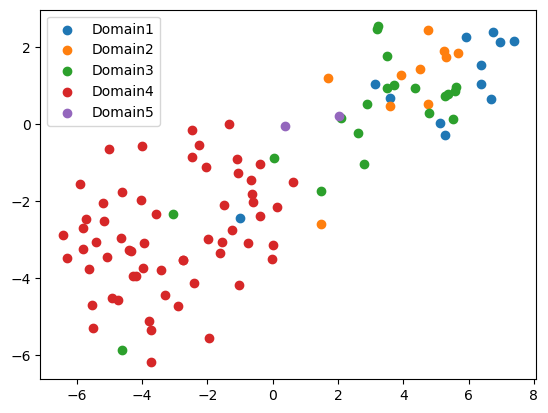

In [6]:
unique_domains = np.unique(domains)
for domain in unique_domains:
    indices = [i for i, d in enumerate(domains) if d == domain]
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label = 'Domain' + str(domain))

plt.legend()
plt.show()